All imports

In [37]:
import spacy
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

Loading the data

In [12]:
df = pd.read_csv('/Users/gauravnaik/Documents/University/Projects/IMDB Large Movie Reviews Sentiment Analysis/IMDB Dataset.csv')

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
nlp = spacy.load("en_core_web_sm")

Preprocessing

In [15]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    doc = nlp(text)
    text = ' '.join([token.text for token in doc if not token.is_stop])
    
    return text

df['review'] = df['review'].apply(preprocess_text)

/var/folders/bx/6vgmywyx4xg7lycxbfjt6d1m0000gn/T/ipykernel_30439/814756455.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [16]:
df.loc[1,"review"]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting discomforting sense realism entire piece actors extremely chosen michael sheen got polari voices pat truly seamless editing guided references williams diary entries worth watching terrificly written performed piece masterful production great masters comedy life realism comes home little things fantasy guard use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating surface terribly'

In [17]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Label Encoding of sentiment column

In [18]:
df["sentiment"] = df["sentiment"].replace("positive",1).replace("negative",0)

/var/folders/bx/6vgmywyx4xg7lycxbfjt6d1m0000gn/T/ipykernel_30439/3744134159.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sentiment"] = df["sentiment"].replace("positive",1).replace("negative",0)


In [19]:
df.head()

,review,sentiment
0,reviewers mentioned watching 1 oz episode ll h...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically s family little boy jake thinks s zo...,0
4,petter matteis love time money visually stunni...,1


Train test split of dataset

In [20]:
X = df['review']
Y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
# Display the result
print("X_train:\n", X_train)
print("\nX_test:\n", X_test)

X_train:
 39087    s kept asking fights screaming matches swearin...
30893    watch entire movie watch entire movie stopped ...
45278    touching love story reminiscent mood love draw...
16398    latterday fulci schlocker totally abysmal conc...
13653    firmly believe norwegian movies continually ge...
                               ...                        
11284    shadow magic recaptures joy amazement movie au...
44732    found movie enjoyable fairly entertaining good...
38158    avoid terrible movie exciting pointless murder...
860      production surprise absolutely love obscure ea...
15795    decent movie little bit short time packs lot a...
Name: review, Length: 40000, dtype: object

X_test:
 33553    liked summerslam look arena curtains look over...
9427     television shows appeal different kinds fans l...
199      film quickly gets major chase scene increasing...
12447    jane austen definitely approve onegwyneth palt...
39489    expectations somewhat high went movie thoug

In [22]:
print("\ny_train:\n", y_train)
print("\ny_test:\n", y_test)


y_train:
 39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

y_test:
 33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


Vectorizing review column

In [23]:
# Bag-of-Words vectorizer
vectorizer = CountVectorizer()

# Fit and transform train data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform test data
X_test_bow = vectorizer.transform(X_test)

# Print vocab size
print("BoW vocabulary size:", X_train_bow.shape[1])

BoW vocabulary size: 191986


In [24]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform train data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

# Print vocab size
print("TF-IDF vocabulary size:", X_train_tfidf.shape[1])

TF-IDF vocabulary size: 191986


Naive Bayes Modelling with TF-IDF vectorized text

In [44]:

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      4961
           1       0.87      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



Confusion Matrix for TF-IDF Naive Bayes:
 [[4313  648]
 [ 696 4343]]


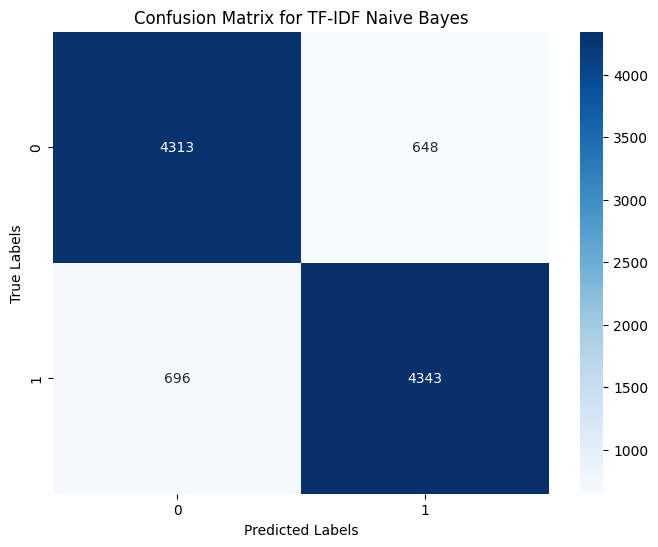

In [45]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for TF-IDF Naive Bayes:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for TF-IDF Naive Bayes')
plt.show()

Naive Bayes Modelling with BoW vectorized text

In [42]:

# Train a Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Predict on the test set
y_pred = model.predict(X_test_bow)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Confusion Matrix for BoW Naive Bayes:
 [[4330  631]
 [ 778 4261]]


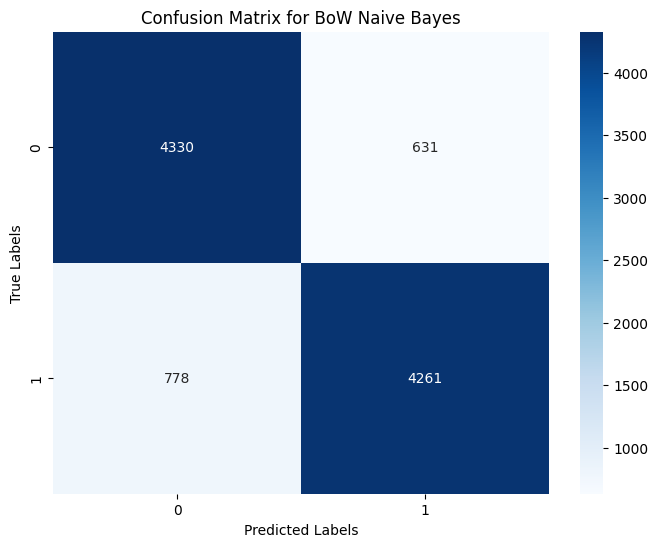

In [43]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for BoW Naive Bayes:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BoW Naive Bayes')
plt.show()

Random Forest Modelling with TF-IDF vectorized text

In [30]:
# Train a Random Forest model
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)

# Evaluate the model
report_tfidf = classification_report(y_test, y_pred_tfidf)

print("TF-IDF - Random Forest Classification Report:\n", report_tfidf)

TF-IDF - Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Confusion Matrix for TF-IDF Random Forest:
 [[4275  686]
 [ 724 4315]]


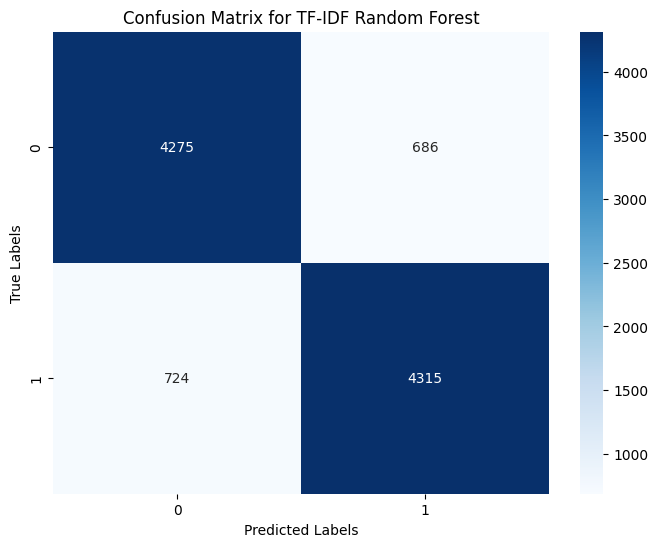

In [40]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)
print("Confusion Matrix for TF-IDF Random Forest:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for TF-IDF Random Forest')
plt.show()

Random Forest Modelling with BoW vectorized text

In [31]:
rf_bow = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bow.fit(X_train_bow, y_train)

# Predict on the test set
y_pred_bow = rf_bow.predict(X_test_bow)

# Evaluate the model
report_bow = classification_report(y_test, y_pred_bow)

print("Bag of Words - Random Forest Classification Report:\n", report_bow)

Bag of Words - Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4961
           1       0.86      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Confusion Matrix for BoW Random Forest:
 [[4273  688]
 [ 689 4350]]


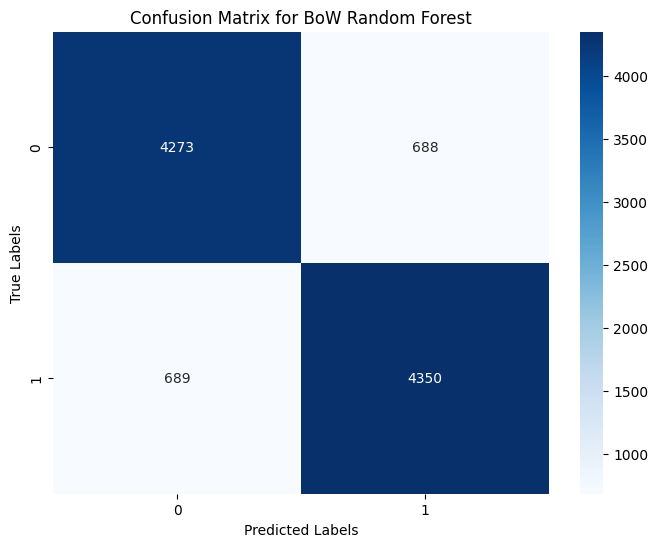

In [41]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bow)
print("Confusion Matrix for BoW Random Forest:\n", conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for BoW Random Forest')
plt.show()

LSTM - Deep Learning Modelling

In [27]:
# Tokenize and pad sequences
max_words = 5000  # Max number of words to consider in the vocabulary
max_len = 100     # Max length of the sequences (reviews)

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the LSTM model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accuracy)

/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.5359 - loss: 0.6859 - val_accuracy: 0.7001 - val_loss: 0.6066
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.6879 - loss: 0.6120 - val_accuracy: 0.7338 - val_loss: 0.5826
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.7618 - loss: 0.5185 - val_accuracy: 0.8491 - val_loss: 0.3490
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.8702 - loss: 0.3240 - val_accuracy: 0.8607 - val_loss: 0.3394
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.8962 - loss: 0.2707 - val_accuracy: 0.8656 - val_loss: 0.3145
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 52ms/step - accuracy: 0.9122 - loss: 0.2314 - val_accuracy: 0.8600 - val_loss: 0.3326
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.9275 - loss: 0.1979 - val_accuracy: 0.8602 - val_loss: 0.3478
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.9431 -

Plotting LSTM Model Accuracy and Loss to visualize results

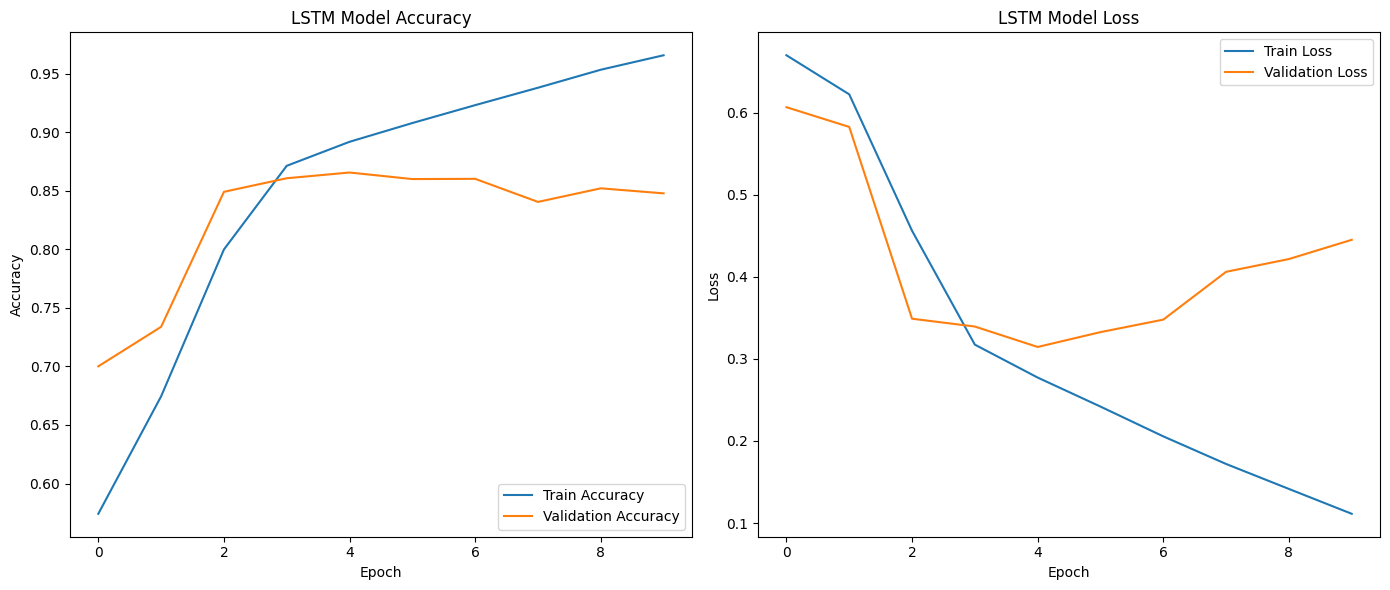

In [47]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()